In [48]:
import pandas as pd

In [49]:
data = pd.read_csv("churn_prediction_simple.csv")

In [50]:
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,0,0.0,0,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,6,2531,42,0,2.0,0,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
2,7,263,42,1,0.0,0,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
3,8,5922,72,0,0.0,1,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
4,9,1145,46,0,0.0,0,623.0,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0


In [51]:
#Separting Dependent and independent variables

X = data.drop(columns =['churn','customer_id'])
Y = data['churn']

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
scaler = StandardScaler()

In [54]:
scaled_X = scaler.fit_transform(X)

In [55]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test,y_train,y_test = tts(scaled_X , Y, train_size = 0.80,stratify = Y ,random_state = 101 )
x_train.shape, x_test.shape,y_train.shape,y_test.shape

((17653, 19), (4414, 19), (17653,), (4414,))

In [56]:
from sklearn.ensemble import BaggingClassifier as BC
classifier = BC()
classifier.fit(x_train, y_train)

BaggingClassifier()

In [57]:
from sklearn.linear_model import LogisticRegression as LR

In [58]:
classifier =BC(estimator = LR(),
               n_estimators = 150 ,
              
               random_state =42)
classifier.fit(x_train,y_train)
predicted_values = classifier.predict(x_train)

In [59]:
from sklearn.ensemble import RandomForestClassifier as RFC
classifier = RFC()

In [60]:
classifier.fit(x_train,y_train)

RandomForestClassifier()

In [61]:
classifier =RFC(
               n_estimators = 150 ,
              
               random_state =42)
classifier.fit(x_train,y_train)
predicted_values = classifier.predict(x_train)

In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_train,predicted_values))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14234
           1       1.00      1.00      1.00      3419

    accuracy                           1.00     17653
   macro avg       1.00      1.00      1.00     17653
weighted avg       1.00      1.00      1.00     17653



In [63]:
predicted_values = classifier.predict(x_test)
print(classification_report(y_test,predicted_values))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      3559
           1       0.71      0.45      0.55       855

    accuracy                           0.86      4414
   macro avg       0.79      0.70      0.73      4414
weighted avg       0.85      0.86      0.85      4414



In [64]:
import numpy as np
import pandas as pd
from scipy.stats import kurtosis, zscore
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
# Sample data (replace with your dataset)
data = np.random.normal(0, 1, 1000)  # Normal distribution for demonstration
data = np.append(data, [15, 16, 17])  # Adding extreme outliers to increase kurtosis

In [66]:
# Calculate kurtosis
kurt_value = kurtosis(data, fisher=True)
print(f"Kurtosis: {kurt_value}")

Kurtosis: 70.06759350708785


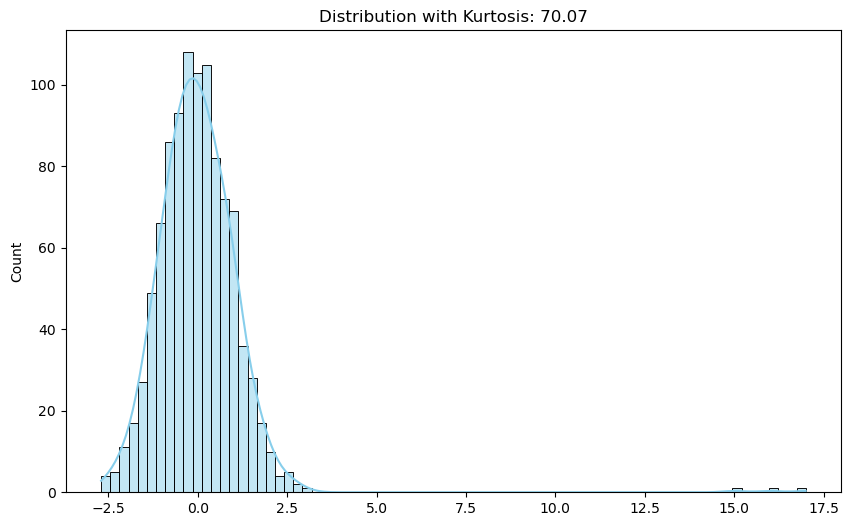

In [67]:
# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(data, kde=True, color='skyblue')
plt.title(f"Distribution with Kurtosis: {kurt_value:.2f}")
plt.show()

In [68]:
# Identify and handle outliers based on Z-score
threshold = 3  # Define threshold for z-score, usually 3 or more
data_no_outliers = data[np.abs(zscore(data)) < threshold]

In [69]:
# Recalculate kurtosis after handling outliers
kurt_value_no_outliers = kurtosis(data_no_outliers, fisher=True)
print(f"Kurtosis after handling outliers: {kurt_value_no_outliers}")

Kurtosis after handling outliers: -0.052075632226454616


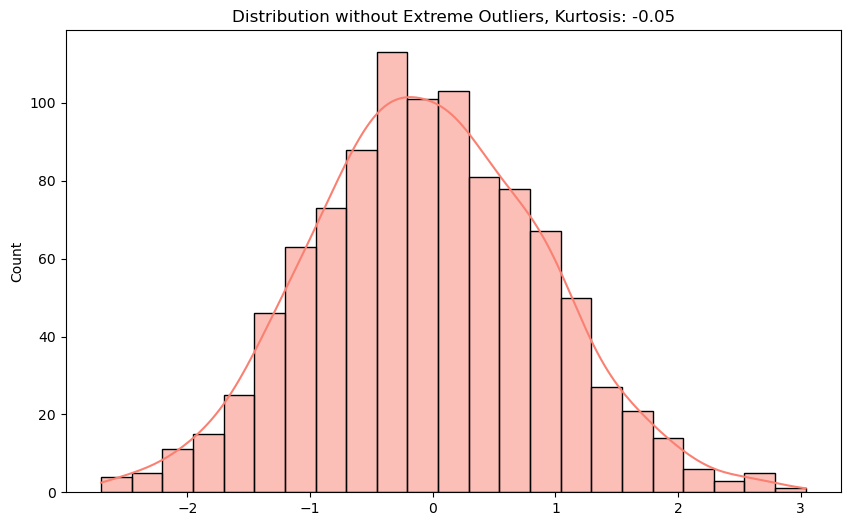

In [70]:
# Plot histogram without outliers
plt.figure(figsize=(10, 6))
sns.histplot(data_no_outliers, kde=True, color='salmon')
plt.title(f"Distribution without Extreme Outliers, Kurtosis: {kurt_value_no_outliers:.2f}")
plt.show()